# Libros de Jupyter - Python


## Requerimientos

Antes de comenzar, asegúrate de tener instalado Python 3.6 o superior. Si no lo tienes, puedes descargarlo desde [python.org](python.org). Adicional a esto, necesitaras instalar una serie de paquetes que se utilizan en este libro. Para esto, puedes utilizar el gestor de paquetes de Python, `pip`. Si no tienes `pip` instalado, puedes descargarlo desde [pip.pypa.io](pip.pypa.io), e igualmente se recomienda encarecidamente usar [Mambaforge](https://mamba.readthedocs.io/en/latest/installation.html).

Puedes instalar los paquetes necesarios con los siguientes comandos:

```bash
# En Pip
pip install -q numpy pandas matplotlib seaborn pyodbc python-dotenv 'sqlalchemy<2.0'
# En Conda
conda install -c conda-forge statsmodels pandas matplotlib scipy
```

## Librerias

Necesitas utilizar ciertas librerías para poder hacer consultas, a continuación importaremos las librerías necesarias para poder hacer consultas en nuestra base de datos.

In [1]:
# SQL Alchemy nos permite crear la conexión con la base de datos
from sqlalchemy import create_engine
# Usaremos dotenv para leer las variables de entorno
from dotenv import load_dotenv
# Usaremos os para leer el archivo .env
import os
# Pandas nos permite leer los datos de la base de datos
import pandas as pd
# Numpy nos permite trabajar con los datos
import numpy as np
# Matplotlib nos permite graficar
import matplotlib.pyplot as plt
load_dotenv()

print('Librerías importadas')

Librerías importadas


Una vez importadas las librerías que requerimos para ejecutar el código, realicemos la conexión a la base de datos.

In [2]:
mssqlserver = os.getenv("mssqlserver")
mssqlport = os.getenv("mssqlport")
mssqldatabase = os.getenv("mssqldatabase")
mssqlusername = os.getenv("mssqlusername")
mssqlpassword = os.getenv("mssqlpassword")

engine = create_engine('mssql+pyodbc://'+mssqlusername+':'+mssqlpassword+'@'+mssqlserver+':'+mssqlport+'/'+mssqldatabase+'?driver=ODBC+Driver+18+for+SQL+Server&TrustServerCertificate=yes')

print('Conexión establecida')

Conexión establecida


Posterior a establecer la conexión, podemos empezar a trabajar en la consulta SQL que deseamos ejecutar. En este caso, vamos a utilizar como ejemplo la base de datos "MagayaData".

In [3]:
# Aquí podrás insertar el código SQL que quieras ejecutar, recomendamos el uso de triple comillas para que sea mas legible
sql = """
SELECT TOP(1000) * FROM master;
"""


Ahora una vez escrito nuestro query, probemos ejecutarlo.

In [4]:
# Se crea el dataframe con los datos de la base de datos
df = pd.read_sql_query(sql, engine)

# Veamos un resumen de los datos
df

,id,pk_numero,pk_fecha_creacion,pk_division,pk_pais,pk_patologia,pk_ciudad_paciente,pk_medico_tratante,pk_especialidad,pk_iniciales_paciente,...,pk_dosis,pk_frecuencia_admon,pk_pmrlemtrada_tipoprueba,pk_hrd,pk_po_guid,pk_paciente_guid,pk_medico_guid,pk_notes,pk_institucion_atencion_paciente,pk_ciudad_institucion_med
0,1,433,2017-02-01T16:24:06-05:00,Pharma,,Fabry,BARRANQUILLA,QUIÑONEZ JAIRO,,ADJVV,...,,,,,bb9796d1-2fb4-4632-a5f2-d1f4c95fa529,0f205dbf-6204-472c-96c3-e49b92b9b184,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
1,2,432,2017-02-01T16:15:23-05:00,Pharma,,Fabry,BARRANQUILLA,QUIÑONEZ JAIRO,,YMVV,...,,,,,9bdae8ff-1348-4023-b6f9-fc85e16cf0c9,bb4e1082-137d-4771-99ed-873e79335ce1,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
2,3,431,2017-02-01T16:08:52-05:00,Pharma,,MPS I,POPAYAN,QUIÑONEZ JAIRO,,FLSI,...,,,,,d8a275c3-e74f-4106-9e16-c393b23274ec,78e2fe3b-42e2-49ac-96bb-8a91a9d7cd22,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
3,4,430,2017-02-01T15:35:24-05:00,Pharma,,Gaucher,MEDELLIN,QUIÑONEZ JAIRO,,JEAL,...,,,,,9893f097-a609-40a0-b3f0-25495c7ac5b3,1a960fd5-1a4b-45e8-a9c6-f0d495136dd3,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
4,5,429,2017-02-01T15:20:17-05:00,Pharma,,Gaucher,MEDELLIN,QUIÑONEZ JAIRO,,EJAC,...,,,,,669007e6-d6a7-47db-a97b-7af5db5b3fab,b25309aa-8cd7-435c-bb7e-bf03d87c8592,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1101,1407,2017-03-23T11:27:34-05:00,Pharma,,MPS I,BOGOTA,QUIÑONEZ JAIRO,,SLR,...,,,,,89d8aba5-4b06-4933-837b-09008f1180e1,212123ea-843b-489d-9ff3-76dfac72ed51,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
996,1102,1406,2017-03-23T11:03:44-05:00,Pharma,,PMR - Lemtrada,IBAGUE,QUIÑONEZ JAIRO,,ELVIA ISMENIA OSPINA,...,,,,,a9eab669-72b0-436f-822a-ac57439360c8,c0f2dd06-e7c0-4d43-86aa-c6f57f40cad3,91ecc77e-9294-444b-8bf5-5767a1c31da4,"Monitoreo Mensual: Cuadro Hemático, Creatinin...",,None
997,1103,1405,2017-03-23T10:55:57-05:00,Pharma,,Gaucher,BOGOTA,QUIÑONEZ JAIRO,,SPHR,...,,,,,2cf7b9d1-2fa3-4256-9f4b-411bb22d0d5f,14ea1228-e486-4190-9938-75d866c040fc,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None
998,1104,756-R,2017-03-23T10:36:00-05:00,Pharma,,Gaucher,BARRANQUILLA,QUIÑONEZ JAIRO,,MCMM,...,,,,,83da5faa-5fdd-4bd7-af07-117e64b7a9f6,378b6bc9-7f78-4b16-b650-88aaa985c084,91ecc77e-9294-444b-8bf5-5767a1c31da4,,,None


In [5]:
# The first colon (:) means "all rows", the second colon (:2) means "select columns 0 and 1"

A = np.array([
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
])

print(A[:, :2])

[['a' 'b']
 ['d' 'e']
 ['g' 'h']]


In [6]:
a = np.arange(5)
a + 20
print(a)

[0 1 2 3 4]


In [7]:
a = np.arange(5)

print(a <= 3)

[ True  True  True  True False]


In [8]:
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned)

Tom      8
Kris     2
Ahmad    5
Beau     6
dtype: int64


In [9]:
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned[certificates_earned > 5])

Tom     8
Beau    6
dtype: int64


In [10]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})

certificates_earned.index = ['Tom', 'Kris', 'Ahmad', 'Beau']

print(certificates_earned.iloc[2])

Certificates        5
Time (in months)    9
Name: Ahmad, dtype: int64


In [11]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})
names = ['Tom', 'Kris', 'Ahmad', 'Beau']

certificates_earned.index = names
longest_streak = pd.Series([13, 11, 9, 7], index=names)
certificates_earned['Longest streak'] = longest_streak

print(certificates_earned)

       Certificates  Time (in months)  Longest streak
Tom               8                16              13
Kris              2                 5              11
Ahmad             5                 9               9
Beau              6                12               7


In [12]:
s = pd.Series(['a', 3, np.nan, 1, np.nan])

print(s.notnull().sum())

3


In [13]:
s = pd.Series([np.nan, 1, 2, np.nan, 3])
s = s.fillna(method='ffill')

print(s)

0    NaN
1    1.0
2    2.0
3    2.0
4    3.0
dtype: float64


<Axes: >

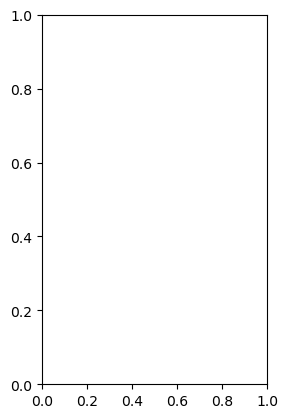

In [14]:
plt.subplot(1, 2, 1)

In [15]:
b = np.array([[1.0,2.0,3.0],[3.0,4.0,5.0]])
print(b)

[[1. 2. 3.]
 [3. 4. 5.]]


In [16]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(np.full_like(a, 100))

[[100 100 100 100 100]
 [100 100 100 100 100]]


In [18]:
a = np.array([1, 2, 3, 4, 5])
b = a
b[2] = 20

print(a)

[ 1  2 20  4  5]


In [20]:
a = np.array(([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]))
b = np.max(a, axis=1).sum()

print(b)

15


In [21]:
a = np.ones((2, 4))
b = a.reshape((4, 2))
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
